In [194]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer

In [195]:
# Locations holding data for traffic for 7 found cities and full dataframe for county recommendations
processed_traffic_folder = '/Users/bryan/Movies/Data For TDI Project/Processed_Data_City_Level'
processed_recommendation_data = '/Users/bryan/Movies/Data For TDI Project/Processed_Data_County_Level'

In [196]:
# Load all data into memory
county_recommendations_df = pd.read_csv(os.path.join(processed_recommendation_data,'for_county_recommendations.csv'))
boston_traffic_df = pd.read_csv(os.path.join(processed_traffic_folder,'boston_traffic.csv'))
cincinnati_traffic_df = pd.read_csv(os.path.join(processed_traffic_folder,'cincinnati_traffic.csv'))
los_angeles_traffic_df = pd.read_csv(os.path.join(processed_traffic_folder,'los_angeles_traffic.csv'))
pittsburgh_traffic_df = pd.read_csv(os.path.join(processed_traffic_folder,'pittsburgh_traffic.csv'))
san_francisco_traffic_df = pd.read_csv(os.path.join(processed_traffic_folder,'san_francisco_traffic.csv'))
seattle_traffic_df = pd.read_csv(os.path.join(processed_traffic_folder,'seattle_traffic.csv'))
washington_DC_traffic_df = pd.read_csv(os.path.join(processed_traffic_folder,'washington_DC_traffic.csv'))

In [197]:
# Boston is in Suffolk County, Massachusetts (FIPS=25025)
# Cincinnati is in Hamilton County, Ohio (FIPS=39061)
# Los Angeles is in Los Angeles County, California (FIPS=6037)
# Pittsburgh is in Allegheny County, Pennsylvania (FIPS=42003)
# San Francisco is in San Francisco County, California (FIPS=6075)
# Seattle is in King County, Washington (FIPS=53033)
# Washington DC is in Washington DC County (FIPS=11001)

# Using these FIPS numbers we will correlate these cities with the corresponding county-level information
# the other dataframe

# First however, we calculate and store only a subset of the information for each cities traffic
# Here I have chosen to calculate the average time for morning commute by averaging mean travel times from 8-10
# on weekdays
selected_hours = list(range(8,11))
travel_df = pd.DataFrame(columns=['FIPS','Mean Morning Commute'])
# travel_df['FIPS'] = [25025,9061,6037,42003,6075,53033,11001]

# Calculate the average travel time for each city
boston=boston_traffic_df[boston_traffic_df['Hour of Day'].isin(selected_hours)]['Mean Travel Time (Weekday)'].mean()
cincinnati=cincinnati_traffic_df[cincinnati_traffic_df['Hour of Day'].isin(selected_hours)]['Mean Travel Time (Weekday)'].mean()
los_angeles=los_angeles_traffic_df[los_angeles_traffic_df['Hour of Day'].isin(selected_hours)]['Mean Travel Time (Weekday)'].mean()
pittsburgh=pittsburgh_traffic_df[pittsburgh_traffic_df['Hour of Day'].isin(selected_hours)]['Mean Travel Time (Weekday)'].mean()
san_francisco=san_francisco_traffic_df[san_francisco_traffic_df['Hour of Day'].isin(selected_hours)]['Mean Travel Time (Weekday)'].mean()
seattle=seattle_traffic_df[seattle_traffic_df['Hour of Day'].isin(selected_hours)]['Mean Travel Time (Weekday)'].mean()
washington_DC=washington_DC_traffic_df[washington_DC_traffic_df['Hour of Day'].isin(selected_hours)]['Mean Travel Time (Weekday)'].mean()

# Pass the row elements as key value pairs to append() function 
travel_df = travel_df.append({'FIPS' : 25025 , 'Mean Morning Commute' : boston} , ignore_index=True)
travel_df = travel_df.append({'FIPS' : 9061 , 'Mean Morning Commute' : cincinnati} , ignore_index=True)
travel_df = travel_df.append({'FIPS' : 6037 , 'Mean Morning Commute' : los_angeles} , ignore_index=True)
travel_df = travel_df.append({'FIPS' : 42003 , 'Mean Morning Commute' : pittsburgh} , ignore_index=True)
travel_df = travel_df.append({'FIPS' : 6075 , 'Mean Morning Commute' : san_francisco} , ignore_index=True)
travel_df = travel_df.append({'FIPS' : 53033 , 'Mean Morning Commute' : seattle} , ignore_index=True)
travel_df = travel_df.append({'FIPS' : 11001 , 'Mean Morning Commute' : washington_DC} , ignore_index=True)

In [198]:
# Now that we have a dataframe with travel information we take merge with main dataframe and take intersection
intersection_df = pd.merge(county_recommendations_df,travel_df[['FIPS','Mean Morning Commute']],how='inner',on='FIPS')
intersection_df.head(7)
# We note here that Hamilton County (Cincinnati) is not in the intersection
# It was probably one of the few counties dropped due to too much missing data during previous cleanup

,Unnamed: 0,index,Mean Income,Unemployment Rate,Rural-Urban Continuum Code,Avg Num Of Sales,crime_rate_per_100000,Avg Listing Price,Avg Listing Per Sqr Ft,FIPS,StateName,CountyName,Mean Morning Commute
0,201,212.0,64912.0,4.7,1.0,8069.600000,444.800814,6.594661e+05,429.229067,6037,California,Los Angeles,1389.278976
1,220,231.0,109601.0,2.9,1.0,517.000000,701.421710,1.256455e+06,1046.810596,6075,California,San Francisco,1193.401025
2,316,331.0,80153.0,6.1,1.0,748.818182,1216.801325,5.859583e+05,541.925014,11001,District of Columbia,District of Columbia,895.952836
3,1225,1253.0,65999.0,3.4,1.0,489.636364,831.234290,6.863333e+05,639.930791,25025,Massachusetts,Suffolk,1132.626948
4,2241,2286.0,58547.0,4.8,1.0,1800.100000,409.491631,1.864917e+05,123.919994,42003,Pennsylvania,Allegheny,1034.228737
5,2964,3019.0,89519.0,3.7,1.0,2785.166667,337.205770,6.377241e+05,355.913897,53033,Washington,King,874.896500


In [199]:
# We now remove rows which will not be useful for our next comparison
# We leave in County Name so we can label following plots
intersection_df.drop(columns=['Unnamed: 0','index','FIPS','StateName','Rural-Urban Continuum Code'], inplace=True)
intersection_df.head(7)

,Mean Income,Unemployment Rate,Avg Num Of Sales,crime_rate_per_100000,Avg Listing Price,Avg Listing Per Sqr Ft,CountyName,Mean Morning Commute
0,64912.0,4.7,8069.600000,444.800814,6.594661e+05,429.229067,Los Angeles,1389.278976
1,109601.0,2.9,517.000000,701.421710,1.256455e+06,1046.810596,San Francisco,1193.401025
2,80153.0,6.1,748.818182,1216.801325,5.859583e+05,541.925014,District of Columbia,895.952836
3,65999.0,3.4,489.636364,831.234290,6.863333e+05,639.930791,Suffolk,1132.626948
4,58547.0,4.8,1800.100000,409.491631,1.864917e+05,123.919994,Allegheny,1034.228737
5,89519.0,3.7,2785.166667,337.205770,6.377241e+05,355.913897,King,874.896500


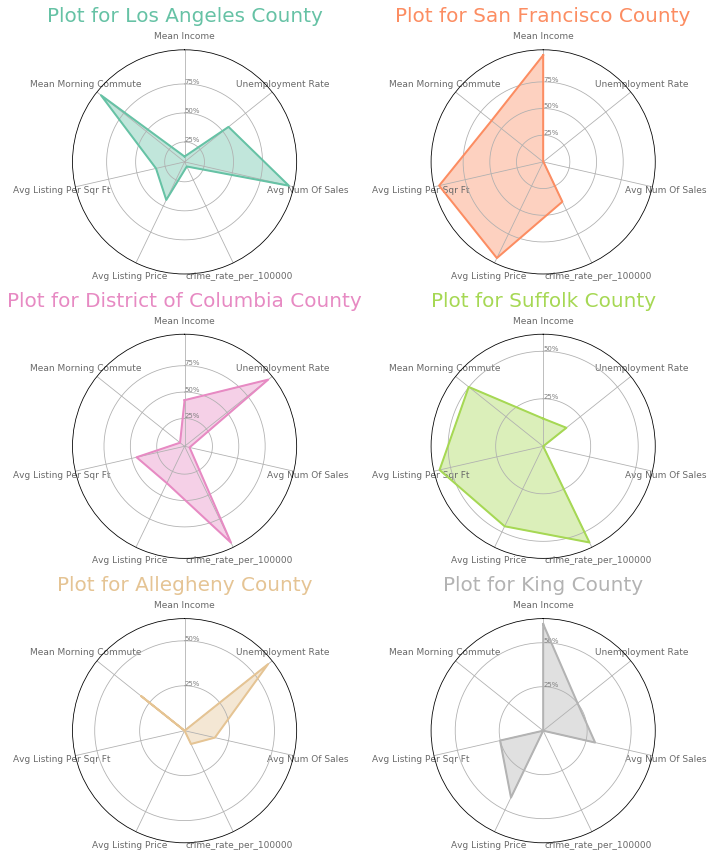

In [204]:
def make_spider(df, row, title, color):
    
    # Remove feature used for title creation
    df=df.drop(columns='CountyName')
    
#     categories=list(df)[1:]
    categories = list(df)
    N = len(categories)

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(round(df.shape[0]/2), 2, row+1, polar=True)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='dimgray', size=9)

    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["25%","50%","75%"], color="grey", size=7)
#     plt.ylim(0,1)
    
#     values=df.loc[row].drop('CountyName').values.flatten().tolist()
    values=df.loc[row].values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    title = 'Plot for ' + title + ' County'
    plt.title(title, size=20, color=color, y=1.1)
    plt.tight_layout()

# Scale all data in the dataframe before making plots
label_df = intersection_df['CountyName'].copy(deep=True)
intersection_df.drop(columns=['CountyName'],inplace=True)
column_names = intersection_df.columns
X = intersection_df.values
    
scaler = MinMaxScaler()
minmax_scaled_X = scaler.fit_transform(X)
intersection_df = pd.DataFrame()
intersection_df = pd.DataFrame(minmax_scaled_X, 
                                columns=column_names)
intersection_df['CountyName'] = label_df   
    

plt.figure(figsize=(10, 12))

my_palette = plt.cm.get_cmap("Set2", len(intersection_df.index))

# row=3
# make_spider(intersection_df, row=row, title=intersection_df['CountyName'][row], color=my_palette(row))
for row in range(intersection_df.shape[0]):
    make_spider(intersection_df,row=row, title=intersection_df['CountyName'][row], color=my_palette(row))
plt.tight_layout()
# plt.savefig('plots/km.png')